In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
%matplotlib inline

In [21]:
education = pd.read_csv('Education.csv', encoding='ISO-8859-1', header=0)
education = education.iloc[:, :-1]
education = education.dropna().reset_index(drop=True)
education

,FIPS Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,"Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2013-17","High school diploma only, 2013-17","Some college or associate's degree, 2013-17","Bachelor's degree or higher, 2013-17","Percent of adults with less than a high school diploma, 2013-17","Percent of adults with a high school diploma only, 2013-17","Percent of adults completing some college or associate's degree, 2013-17","Percent of adults with a bachelor's degree or higher, 2013-17"
0,1001.0,AL,Autauga County,2.0,2.0,2.0,2.0,"6,611","3,757",933,...,26.9,18.0,"4,521","12,363","10,697","9,176",12.3,33.6,29.1,25.0
1,1003.0,AL,Baldwin County,4.0,5.0,3.0,2.0,"18,726","8,426","2,334",...,29.3,23.1,"13,997","39,771","45,286","43,968",9.8,27.8,31.7,30.7
2,1005.0,AL,Barbour County,6.0,6.0,6.0,6.0,"8,120","2,242",581,...,21.3,10.9,"4,960","6,549","4,707","2,218",26.9,35.5,25.5,12.0
3,1007.0,AL,Bibb County,1.0,1.0,1.0,1.0,"5,272","1,402",238,...,20.4,7.1,"2,833","6,958","3,971","2,097",17.9,43.9,25.0,13.2
4,1009.0,AL,Blount County,1.0,1.0,1.0,1.0,"10,677","3,440",626,...,24.8,9.6,"7,980","12,740","13,583","5,172",20.2,32.3,34.4,13.1
5,1011.0,AL,Bullock County,6.0,6.0,6.0,6.0,"4,245",958,305,...,17.5,7.7,"2,113","2,699","1,575",990,28.6,36.6,21.4,13.4
6,1013.0,AL,Butler County,6.0,6.0,6.0,6.0,"8,353","2,459",499,...,22.9,10.4,"2,645","5,637","3,423","2,253",18.9,40.4,24.5,16.1
7,1015.0,AL,Calhoun County,3.0,2.0,3.0,2.0,"30,535","13,804","3,823",...,26.4,15.2,"13,254","25,440","26,168","14,113",16.8,32.2,33.1,17.9
8,1017.0,AL,Chambers County,6.0,5.0,6.0,5.0,"13,616","4,816",927,...,22.5,9.5,"4,537","9,109","6,894","3,158",19.1,38.4,29.1,13.3
9,1019.0,AL,Cherokee County,8.0,6.0,6.0,6.0,"6,126","1,878",440,...,18.9,9.7,"3,850","7,179","5,424","2,344",20.5,38.2,28.9,12.5


1) Plot a histogram of the percentage of adults with a bachelor's degree or higher in 2000.

(array([ 645., 1351.,  605.,  277.,  124.,   60.,   38.,   16.,    6.,
           3.]),
 array([ 4.9 , 10.78, 16.66, 22.54, 28.42, 34.3 , 40.18, 46.06, 51.94,
        57.82, 63.7 ]),
 <a list of 10 Patch objects>)

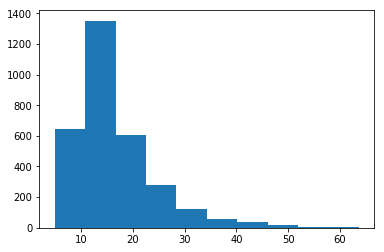

In [22]:
plt.hist(education["Percent of adults with a bachelor's degree or higher, 2000"])

2) Plot a boxplot of the percentage of adults with a bachelor's degree or higher in 2000. Are there any outliers? If so, how many? What is the cutoff for an outlier on either side?

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1491aba8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a14816fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1491acf8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a148088d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a148087f0>],
 'means': []}

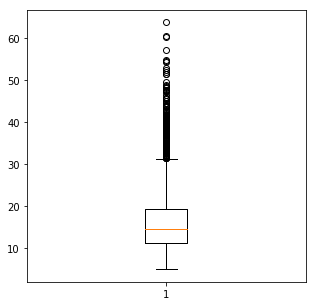

In [23]:
fig = plt.figure(figsize=(5,5))
plt.boxplot(education["Percent of adults with a bachelor's degree or higher, 2000"])

In [24]:
q1 = np.percentile(education["Percent of adults with a bachelor's degree or higher, 2000"], q=25)
q3 = np.percentile(education["Percent of adults with a bachelor's degree or higher, 2000"], q=75)
iqr = q3 - q1
up = q3 + (1.5*iqr)
down = q1 - (1.5*iqr)
print("The cutoff for an outlier is above", up, "and below", down ,".","The interquartile range is", iqr, ".")
print(len(education[education["Percent of adults with a bachelor's degree or higher, 2000"] > up]), "outliers")

The cutoff for an outlier is above 31.3 and below -0.6999999999999993 . The interquartile range is 8.0 .
174 outliers


3) Which state has the highest average percentage of adults with a bachelor's degree? Which state has the lowest? (We want to take the average of the percentage of bachelor's degrees in each county per state) / (Save this to a new variable, as we'll be using it a lot)

In [25]:
state_graduation = education.groupby("State")["Percent of adults with a bachelor's degree or higher, 2000"].mean()
high = state_graduation[state_graduation == np.max(state_graduation)]
low = state_graduation[state_graduation == np.min(state_graduation)]
print("highest = ", high,"\n", "lowest = ", low)

s_mean = education.groupby("State")["Percent of adults with a bachelor's degree or higher, 2000"].mean().mean()
print("average is", s_mean)
education.groupby("State")["Percent of adults with a bachelor's degree or higher, 2000"].mean().std()

highest =  State
DC    39.1
Name: Percent of adults with a bachelor's degree or higher, 2000, dtype: float64 
 lowest =  State
KY    11.554167
Name: Percent of adults with a bachelor's degree or higher, 2000, dtype: float64
average is 19.00444266239869


5.700055750045903

4) Plot a histogram for the percentage of adults with a bachelor degree by state.

(array([ 9., 16.,  8.,  8.,  2.,  4.,  1.,  2.,  0.,  1.]),
 array([11.55416667, 14.30875   , 17.06333333, 19.81791667, 22.5725    ,
        25.32708333, 28.08166667, 30.83625   , 33.59083333, 36.34541667,
        39.1       ]),
 <a list of 10 Patch objects>)

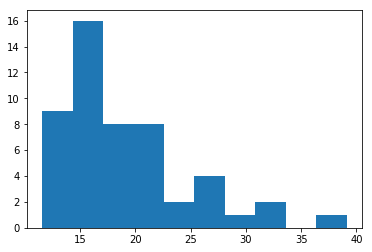

In [26]:
plt.hist(state_graduation)

5) Plot a boxplot for the percentage of adults with a bachelor degree by state. Are there any outliers? If so, how many? What is the cutoff for an outlier on either side?

The cutoff for an outlier is above 29.785506153105203 and below 6.752526965668318 . The interquartile range is 5.758244796859222 .
There are  3 outliers.


State
DC    39.100000
MA    32.057143
RI    30.840000
Name: Percent of adults with a bachelor's degree or higher, 2000, dtype: float64

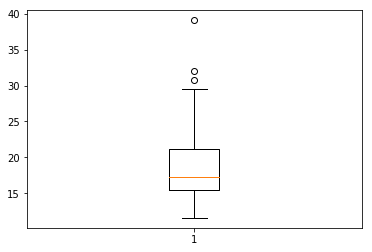

In [27]:
plt.boxplot(state_graduation)
q1 = np.percentile(state_graduation, q=25)
q2 = np.percentile(state_graduation, q=75)
iqr = q2 - q1
up = q2 + (1.5*iqr)
down = q1 - (1.5*iqr)
print("The cutoff for an outlier is above", up, "and below", down ,".","The interquartile range is", iqr, ".")
print("There are ",len((state_graduation[state_graduation>up])), "outliers.")
state_graduation[state_graduation>up]

6) Now, let's read in a dataset that tells us whether a particular state voted for Al Gore or George Bush in 2000.

In [28]:
state_results = pd.read_html('https://transition.fec.gov/pubrec/2000presgeresults.htm', header =0)[2]
blue_states = state_results[state_results['ELECTORAL VOTE  BUSH'].isnull()]['STATE']
red_states = state_results[state_results['ELECTORAL VOTE  GORE'].isnull()]['STATE']

In [29]:
state_results

,STATE,WRITE-IN (MISCELLANEOUS),NONE OF THESE CANDIDATES,TOTAL VOTES CAST,Unnamed: 4,ELECTORAL VOTE BUSH,ELECTORAL VOTE GORE
0,AL,699,NaN,1666272,NaN,9.0,NaN
1,AK,1068,NaN,285560,NaN,3.0,NaN
2,AZ,NaN,NaN,1532016,NaN,8.0,NaN
3,AR,NaN,NaN,921781,NaN,6.0,NaN
4,CA,6,NaN,10965856,NaN,NaN,54
5,CO,NaN,NaN,1741368,NaN,8.0,NaN
6,CT,10,NaN,1459525,NaN,NaN,8
7,DE,93,NaN,327622,NaN,NaN,3
8,DC,539,NaN,201894,NaN,NaN,2##
9,FL,40,NaN,5963110,NaN,25.0,NaN


7) Create two arrays of the percentage of adults with bachelor degrees for red states and blue states - HINT: you can use the function index.isin(blue_states) and index.isin(red_states) to specifically query blue and red states.

Plot a boxplot showing blue states and red states (hint: you can plot two separate items in a boxplot by plotting an array, i.e. plt.boxplot([a, b])

Do blue states or red states have a higher mean % of bachelor degrees? What are the means of each? What is the mean difference between the two?

Do either groups of states have outliers? Which states are outliers?



In [30]:
b = state_graduation[state_graduation.index.isin(blue_states)]
r = state_graduation[state_graduation.index.isin(red_states)]
len(b)

21

In [31]:
len(r)

30

In [32]:
print("blue mean", b.mean())

blue mean 22.702300477552225


In [33]:
print("red mean", r.mean())

red mean 16.415942191791217


In [34]:
print("blue has a higher mean")
mean_diff = b.mean() - r.mean()
print("mean difference is", mean_diff)

blue has a higher mean
mean difference is 6.286358285761008


{'whiskers': [<matplotlib.lines.Line2D at 0x1a15272160>,
 'caps': [<matplotlib.lines.Line2D at 0x1a15272b38>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a152725f8>,
 'medians': [<matplotlib.lines.Line2D at 0x1a193e2518>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a193e2860>,
 'means': []}

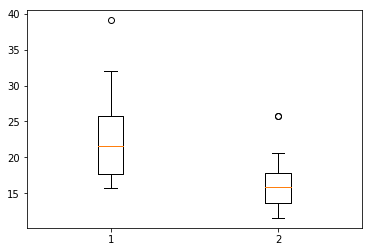

In [35]:
 plt.boxplot([b, r])

In [36]:
q1 = np.percentile(r, q=25)
q2 = np.percentile(r, q=75)
iqr = q2 - q1
up = q2 + (1.5*iqr)
down = q1 - (1.5*iqr)
print("The cutoff for an outlier is above", up, "and below", down ,".","The interquartile range is", iqr, ".")
print("There are ",len((r[r>up])), "outlier for blue states.")
r[r>up]

The cutoff for an outlier is above 24.132666625827028 and below 7.37360757167359 . The interquartile range is 4.18976476353836 .
There are  2 outlier for blue states.


State
CO    25.726984
NH    25.800000
Name: Percent of adults with a bachelor's degree or higher, 2000, dtype: float64

8) Now run a boostrapping example using 10,000 simulations. Use np.random.seed(42) to ensure consistency if you run again. Concatenate the blue states and red states, shuffle them, and then break out new blue states and red states, similar to what we did last week in class. Record the difference between the blue states and red states.

Plot a histogram of the 10,000 differences recorded. What is the average difference?

Text(0.5, 0.92, 'Bootstrap Distribution of Difference Between Samples')

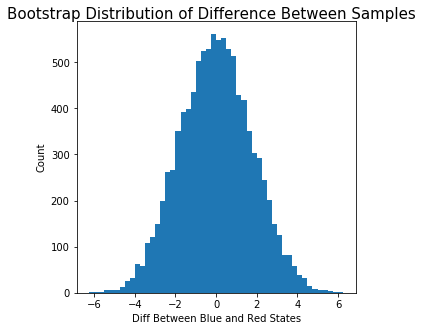

In [37]:
np.random.seed(42)
diff = []
for i in range(10000):
    total = np.concatenate((b, r), axis=None)
    np.random.shuffle(total)
    new_b = total[:len(b)]
    new_r = total[len(r):]
    diff.append(np.mean(new_r) - np.mean(new_b))
fig = plt.figure(figsize=(5,5))
plt.hist(diff, bins=50)
plt.xlabel('Diff Between Blue and Red States')
plt.ylabel('Count')
fig.suptitle('Bootstrap Distribution of Difference Between Samples', fontsize=15, y=0.92)